In [2]:
!pip freeze


absl-py==1.2.0
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.0.8
astunparse==1.6.3
attrs==22.1.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
cachetools==5.2.0
certifi==2022.6.15
cffi==1.15.1
charset-normalizer==2.1.1
cycler==0.11.0
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
executing==1.0.0
fastjsonschema==2.16.1
flatbuffers==2.0.7
fonttools==4.37.1
gast==0.4.0
google-auth==2.11.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
grpcio==1.48.1
h5py==3.7.0
idna==3.3
importlib-metadata==4.12.0
importlib-resources==5.9.0
ipykernel==5.1.1
ipython==8.5.0
ipython-genutils==0.2.0
ipywidgets==8.0.2
jedi==0.17.2
Jinja2==3.1.2
jsonschema==4.15.0
jupyter==1.0.0
jupyter-client==7.3.5
jupyter-console==6.4.4
jupyter-core==4.11.1
jupyter-http-over-ws==0.0.8
jupyterlab-pygments==0.2.2
jupyterlab-widgets==3.0.3
keras==2.10.0
Keras-Preprocessing==1.1.2
kiwisolver==1.4.4
libclang==14.0.6
lxml==4.9.1
Markdown==3.4.1
MarkupSafe==2.1.1
matplotlib==3.5.3
matplo

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-q__tqtcm because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


2.10.0


In [3]:
!pip install pandas
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.2 MB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 498 kB 3.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 451 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 701 kB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 212 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 110 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 36.0 MB 6.5 MB/s eta 0:00:01    |█████                           | 5.6 MB 2.8 MB/s eta 0:00:11
     |████████████████████████████████| 78 kB 5.0 MB/s eta 0:00:01
 

In [204]:
import os
import re
import glob
import shutil
import string
import pathlib

# set the data directory
data_dir = os.path.abspath(os.path.join(os.getcwd(),'..','data'))
#give matplotlib a folder to save its configs
os.environ['MPLCONFIGDIR'] = os.path.join(data_dir,'plt_configs')
import matplotlib.pyplot as plt



import PIL
import PIL.Image

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.layers import TextVectorization
# setup directories, create them if they do not exist within 

In [181]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

## Setting up my Directories

In [151]:
#create directories
fashion_dir = os.path.join(data_dir,'fashion')
if not os.path.exists(fashion_dir):
    os.makedirs(fashion_dir)
    
stylish_dir = os.path.join(data_dir,'fashion','stylishset')
if not os.path.exists(stylish_dir):
    os.makedirs(stylish_dir)
    
unstylish_dir = os.path.join(data_dir,'fashion','unstylishset')
if not os.path.exists(unstylish_dir):
    os.makedirs(unstylish_dir)
    
#split original data set into test/train/val

!pip install split-folders
import splitfolders

test_dir= os.path.join(data_dir,'test')
if not os.path.exists(test_dir):
    os.makedirs(test_dir)
    
# split dataset into val, test, train folders
# splitfolders.ratio("/tf/data/fashion_two", 
#                    output="/tf/data/test_fashion_three", 
#                    seed=42, # The number of seed
#                    ratio=(.7, .2, .1), # The dataset split
#                    group_prefix=None, 
#                    move=True
#                    )
# 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
## read json file into a dataframe to make downloading images from URL simpler
unstylish_urls=pd.read_json('/tf/data/unstylishset.json ')
stylish_urls=pd.read_json('/tf/data/stylishset.json')

In [ ]:
#preview json containg captions and urls
unstylish_urls.head()

In [ ]:
##create list of stylish and unstylish URLs

unstylish= unstylish_urls.url.values.tolist()
stylish=stylish_urls.url.values.tolist()

In [ ]:
import requests.exceptions


## Downloading my images

In [ ]:
### Iterate through a list of unstylish URLs, check for errors. for urls that work, add to list for unstylish URLs. 
#Use TQDM to help monitor progress
from tqdm import tqdm

url_works_unstylish=[]
import requests
from requests.exceptions import ConnectionError
from requests.exceptions import MissingSchema
from requests.exceptions import TooManyRedirects
 
def is_up1(stylishurl_list, url_list):
    for item in tqdm(stylishurl_list):
        url=item
        try:
            r = requests.get(url)
        except ConnectionError:
            continue
        except MissingSchema:
            continue
        except:
            pass
        if r.status_code == 200:
            url_list.append(item)
        else:
            continue
    return url_list[0:10]


In [ ]:
### Iterate through a list of URLs, check for errors. for urls that work, add to list for stylish URLs
url_works_stylish=[] 
def is_up(stylishurl_list, url_list):
    for item in tqdm(stylishurl_list):
        url=item
        try:
            r = requests.get(url)
        except ConnectionError:
            continue
        except MissingSchema:
            continue
        except:
            pass
        if r.status_code == 200:
            url_list.append(item)
        else:
            continue
    return url_list[0:10]


In [ ]:
is_up1(unstylish, url_works_unstylish)

In [ ]:
is_up(stylish, url_works_stylish)

In [ ]:
### provide a list of URLs that work, enumerate the list, download image and generate unique file name STYLISH SET
import shutil
import requests
def image_save_stylish(stylishurl_list):
    for i, item in enumerate(tqdm(stylishurl_list)):
        url=item
        response = requests.get(url, stream=True)
        file_name='/tf/data/fashion/stylishset2/img{}.jpg'.format(i)
        with open(file_name, 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)  
        del response

In [ ]:
### provide a list of URLs that work, download image and generate unique file name unSTYLISH SET

def image_save_unstylish(unstylishurl_list):
    for i, item in enumerate(tqdm(unstylishurl_list)):
        url=item
        response = requests.get(url, stream=True)
        file_name='/tf/data/fashion/unstylishset2/img{}.jpg'.format(i)
        with open(file_name, 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file) 
        del response

In [ ]:
image_save_unstylish(url_works_unstylish)

In [ ]:
image_save_stylish(url_works_stylish)

In [7]:
##load fashion set from data folder
image_count = len(list(pathlib.Path(stylish_dir).glob('*.jpg')))
print(image_count)


3948


(107, 160)


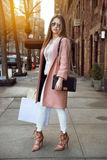

In [8]:
stylish = list(pathlib.Path(stylish_dir).glob('*.jpg'))
print(PIL.Image.open(str(stylish[0])).size)
PIL.Image.open(str(stylish[0]))

In [9]:
#setup unstylish set
image_count = len(list(pathlib.Path(unstylish_dir).glob('*.jpg')))
print(image_count)


6730


(3024, 3024)


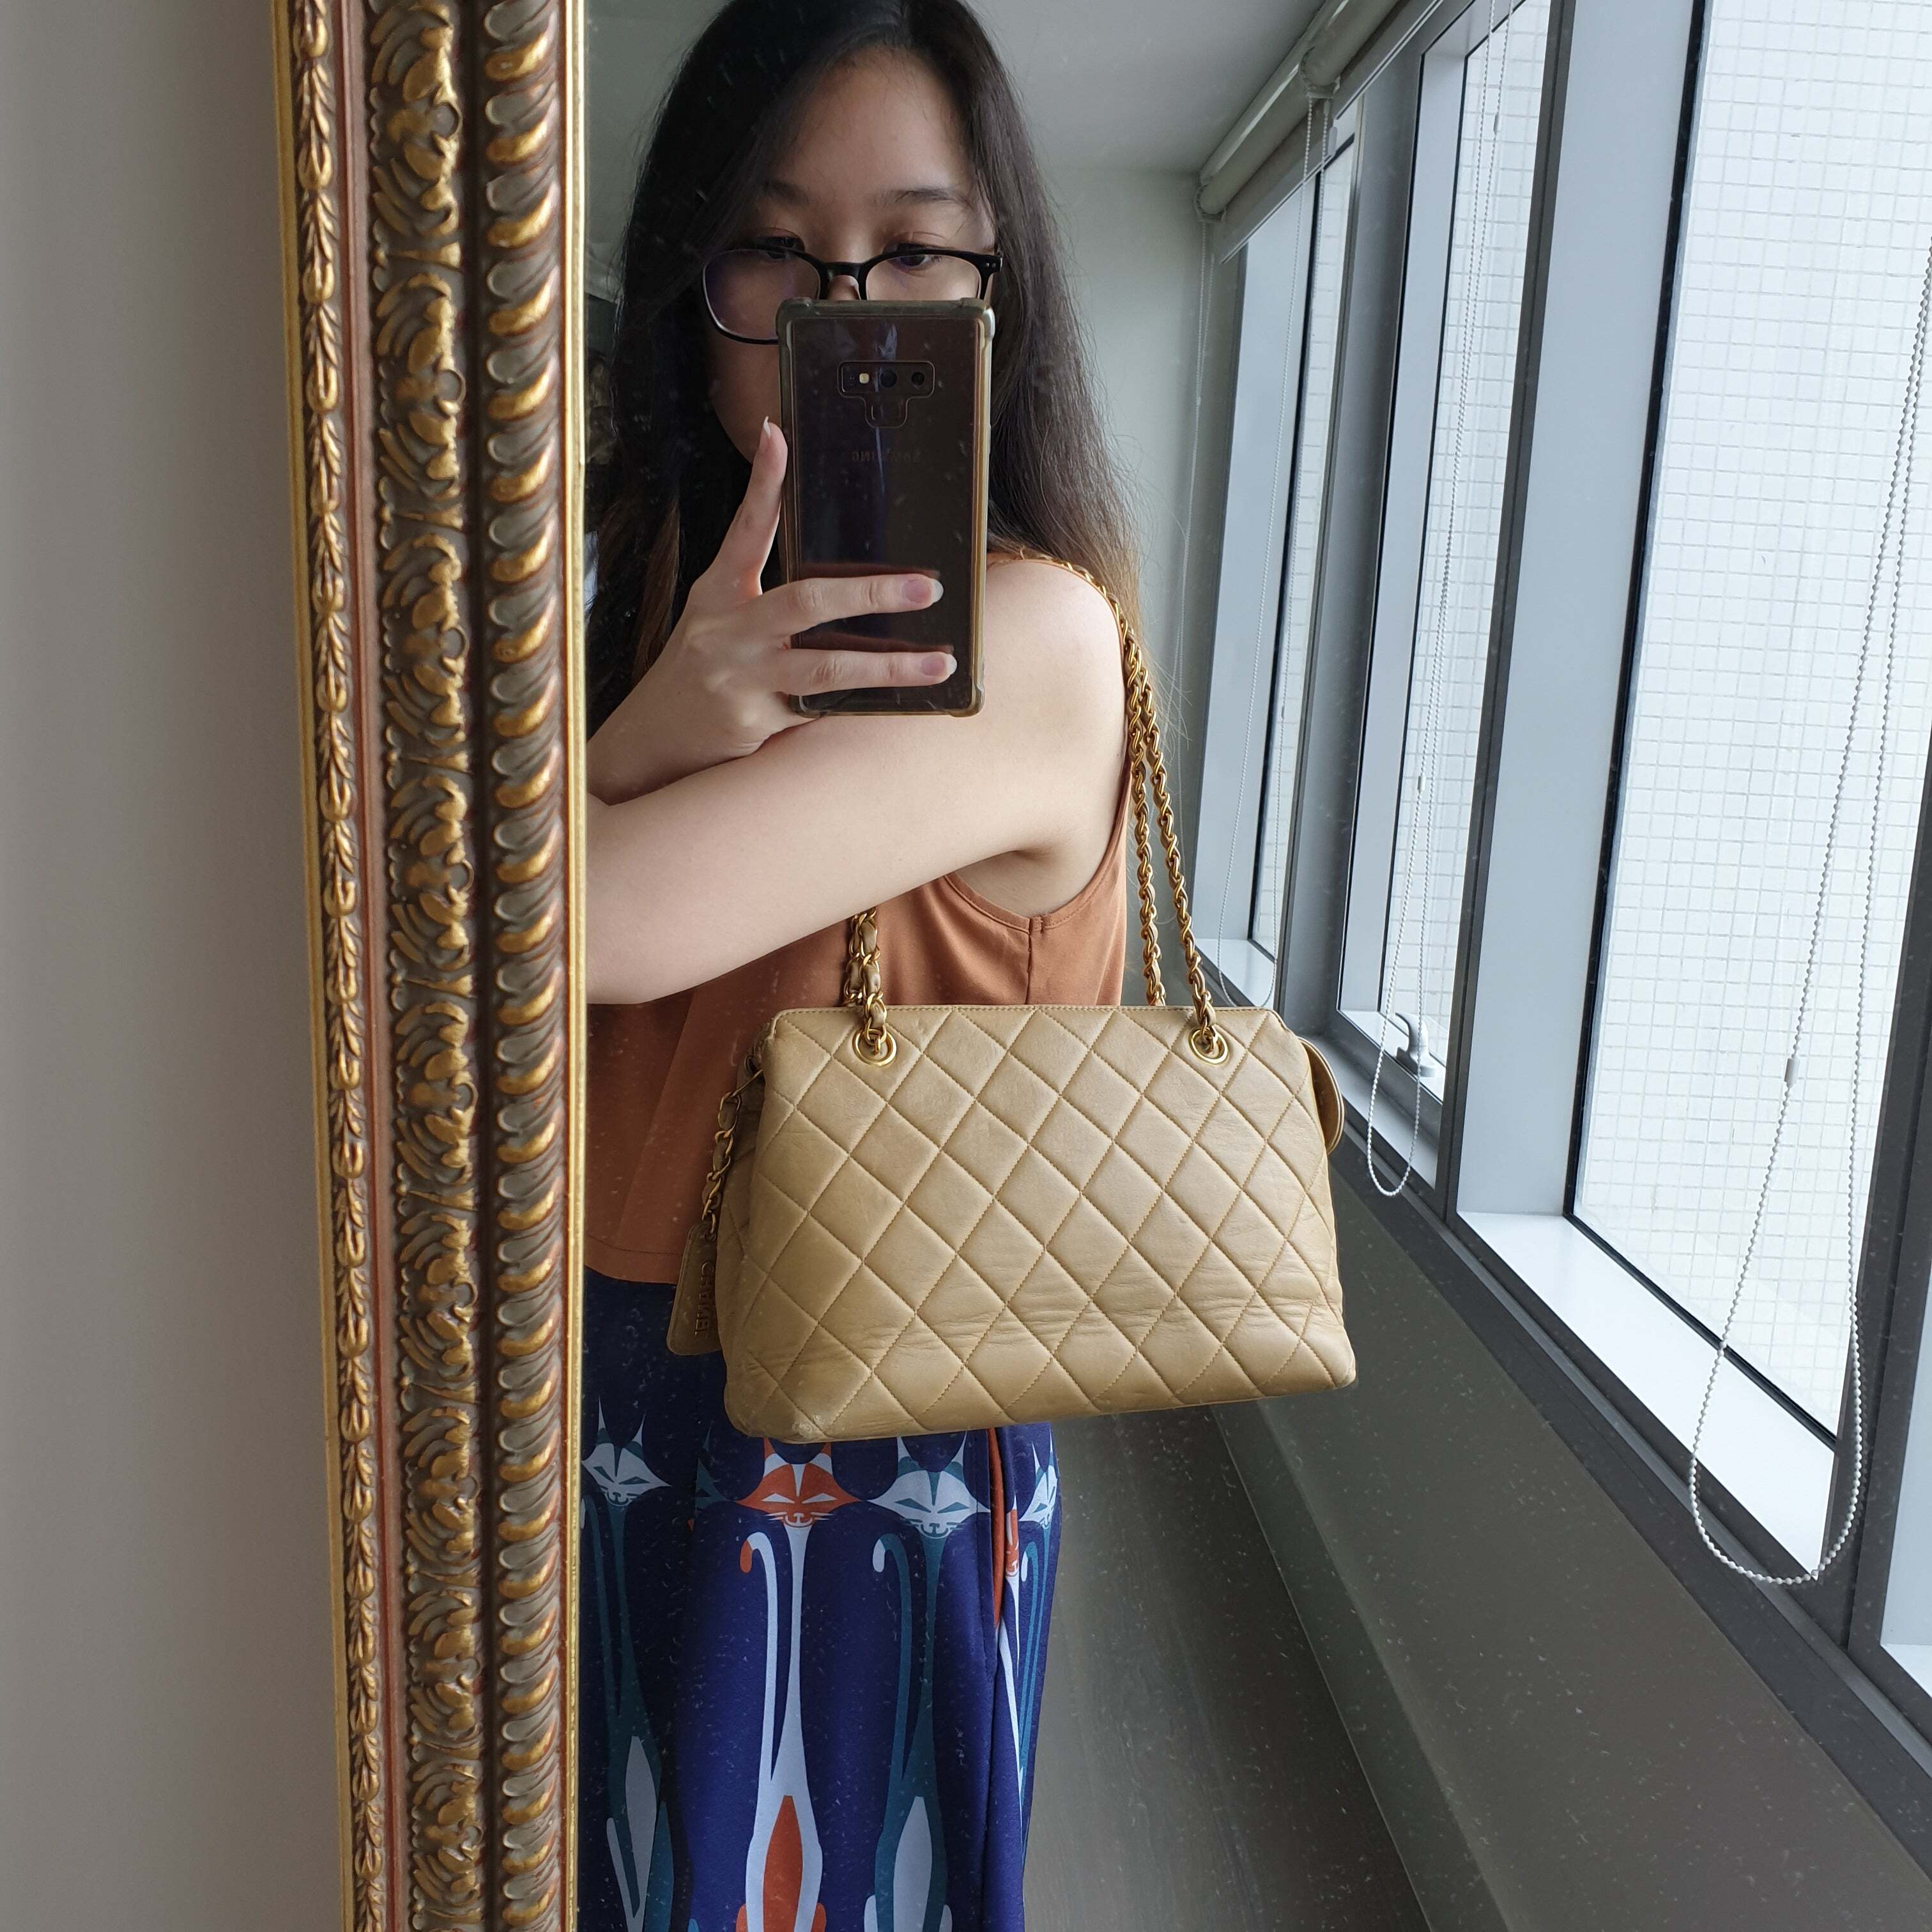

In [10]:
unstylish = list(pathlib.Path(unstylish_dir).glob('*.jpg'))
print(PIL.Image.open(str(unstylish[0])).size)
PIL.Image.open(str(unstylish[0]))

In [113]:
#changed to 16 from 32 to help prevent kernel from dying. 
batch_size = 16 
img_height = 160
img_width = 160

train_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(fashion_dir),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(fashion_dir),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds=tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(test_dir),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 5002 files belonging to 2 classes.
Using 4002 files for training.
Found 5002 files belonging to 2 classes.
Using 1000 files for validation.
Found 41 files belonging to 2 classes.
Using 33 files for training.


In [114]:
class_names = train_ds.class_names
print(class_names)

test_class=test_ds.class_names
print(test_class)



['stylishset', 'unstylishset']
['stylishset', 'unstylishset']


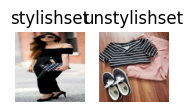

In [7]:
plt.figure(figsize=(2, 2))
for images, labels in train_ds.take(1):
    for i in range(2):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)


In [9]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [182]:
image_batch.dtype

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'type'

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [11]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [152]:
model_name = 'fashion-grader'
output_dir = f'tf/saved_models/{model_name}'
data_dir = os.path.join(os.getcwd(), '..' , f'data/{model_name}')

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

In [153]:

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [139]:
history=model.fit(train_ds,validation_data=val_ds,
  epochs=3, callbacks=[modelcheckpoint])


Epoch 1/3
251/251 [==============================] - 25s 96ms/step - loss: 0.0304 - accuracy: 0.9910 - val_loss: 0.7990 - val_accuracy: 0.8600
Epoch 2/3
251/251 [==============================] - 26s 104ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.9635 - val_accuracy: 0.8560
Epoch 3/3
251/251 [==============================] - 30s 117ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 0.5876 - val_accuracy: 0.8760


In [141]:
# display loss value and metrics during training
history.history

{'loss': [0.030364902690052986, 0.015324628911912441, 0.05939865857362747],
 'accuracy': [0.9910045266151428, 0.9950025081634521, 0.9820089936256409],
 'val_loss': [0.7989914417266846, 0.9634972810745239, 0.5875946283340454],
 'val_accuracy': [0.8600000143051147, 0.8560000061988831, 0.8759999871253967]}

### Evaluate 



In [168]:
#Overfitting
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc)

3/3 - 0s - loss: 1.1326 - accuracy: 0.7576 - 360ms/epoch - 120ms/step

Test accuracy: 0.7575757503509521


In [167]:
model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [166]:
model.load_weights("/tf/training_notebooks/saved_models/fashion-grader/weights.02.hdf5")


# Save Model



In [211]:
pwd()

'/tf/training_notebooks'

In [218]:
model.save(model_path)

INFO:tensorflow:Assets written to: /tf/training_notebooks/saved_models/fashion-grader/assets


INFO:tensorflow:Assets written to: /tf/training_notebooks/saved_models/fashion-grader/assets


In [217]:
model_path= '/tf/training_notebooks/saved_models/fashion-grader/'
